## Nodes

In general, a node consists of the following elements:

    nodename = Nodetype(interface_function(), name = 'labelname')
    
- **nodename**: Variable name of the node in the python environment
- **Nodetype**: Type of node to be created. This can be a `Node`, `MapNode` or `JoinNode`.
- **interface_function**: Function the node should execute. Can be user specific or coming from an `Interface`.
- **labelname**: Label name of the node in the workflow environment (defines the name of the working directory) 

Q: Python environment vs. Workflow environment?
A: When we draw a workflow tree or graph, labelnames will be appeared.



In [47]:
from nipype import Node, Function

def add_two(x_input):
    return x_input + 2

addtwo = Node(Function(input_names = ["x_input"], 
                       output_names = ["val_output"],
                       function = add_two),
              name = 'add_node')

# nodename = addtwo
# Nodetype = node
# interface_function = Function(...)
# labelname = add_node

# Before we run, declare 'x_input'

In [48]:
addtwo.inputs.x_input = 4

# 도대체 이 inputs 은 어디서 나온 애일까 (함수나 method-class function에 값을 넣을 때 쓰는건가)

In [49]:
addtwo.run()

190128-01:08:58,992 nipype.workflow INFO:
	 [Node] Setting-up "add_node" in "/tmp/tmpegsiq_jb/add_node".
190128-01:08:58,996 nipype.workflow INFO:
	 [Node] Running "add_node" ("nipype.interfaces.utility.wrappers.Function")
190128-01:08:59,4 nipype.workflow INFO:
	 [Node] Finished "add_node".


In [50]:
temp_res = addtwo.run()

190128-01:08:59,529 nipype.workflow INFO:
	 [Node] Setting-up "add_node" in "/tmp/tmpegsiq_jb/add_node".
190128-01:08:59,532 nipype.workflow INFO:
	 [Node] Cached "add_node" - collecting precomputed outputs
190128-01:08:59,533 nipype.workflow INFO:
	 [Node] "add_node" found cached.


In [51]:
temp_res.outputs

# output_names = ["..."] 라고 해야 output variable의 이름이 바뀜 


val_output = 6

In [46]:
addtwo.result.outputs


val_output = 6

In [54]:
# You don't have to specify input_names or output_names.

def add_two(x_input):
    return x_input + 2

addtwo = Node(Function(function = add_two), name = 'add_node')
addtwo.inputs.x_input = 2
addtwo.run().outputs

190128-01:10:12,471 nipype.workflow INFO:
	 [Node] Setting-up "add_node" in "/tmp/tmpnnpaimwb/add_node".
190128-01:10:12,474 nipype.workflow INFO:
	 [Node] Running "add_node" ("nipype.interfaces.utility.wrappers.Function")
190128-01:10:12,480 nipype.workflow INFO:
	 [Node] Finished "add_node".



out = 4

## Example of a neuroimaging node

Now, let's put the BET() constructor inside the node as Function.

In [1]:
from nipype.interfaces.fsl import BET

from nipype import Node

bet = Node(BET(frac = 0.3), name = 'bet_node')
bet.inputs.in_file = '/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz'
bet.inputs.out_file = '/output/node_T1w_bet.nii.gz'

In [2]:
res = bet.run() # We have to do .run() to execute the function

190128-01:16:41,811 nipype.workflow INFO:
	 [Node] Setting-up "bet_node" in "/tmp/tmpjtqhq8x8/bet_node".
190128-01:16:41,827 nipype.workflow INFO:
	 [Node] Running "bet_node" ("nipype.interfaces.fsl.preprocess.BET"), a CommandLine Interface with command:
bet /data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz /output/node_T1w_bet.nii.gz -f 0.30
190128-01:16:44,415 nipype.workflow INFO:
	 [Node] Finished "bet_node".


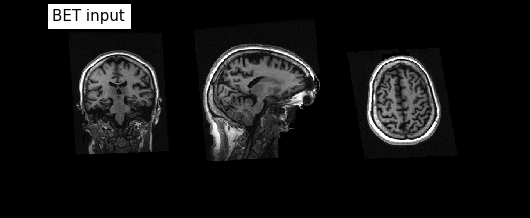

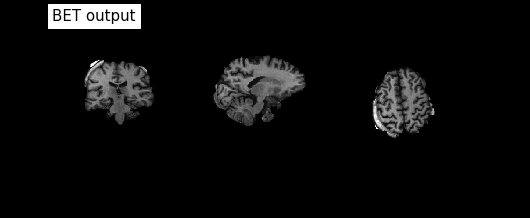

In [3]:
from nilearn.plotting import plot_anat

%matplotlib inline
import matplotlib.pyplot as plt

plot_anat(bet.inputs.in_file, 
          title = 'BET input', 
          cut_coords = (10, 10, 10),
          display_mode = 'ortho', 
          dim = -1,
          draw_cross = False,
          annotate = False);

plot_anat(res.outputs.out_file, #res.outputs.out_file? 
          title = 'BET output',
          cut_coords = (10, 10, 10),
          display_mode = 'ortho',
          dim = -1,
          draw_cross = False,
          annotate = False);

In [14]:
type(res.outputs.out_file)

str

In [15]:
res.outputs.out_file # This is where the skull stripped output is stored.

'/output/node_T1w_bet.nii.gz'

In [19]:
from nipype.interfaces.fsl import IsotropicSmooth

smooth_node = Node(IsotropicSmooth(in_file = '/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz',
                                 out_file = '/output/node_T1w_smooth.nii.gz',
                                 fwhm = 4),
                 name = "smoothing")

smooth_res = smooth_node.run()

190128-01:35:02,262 nipype.workflow INFO:
	 [Node] Setting-up "smoothing" in "/tmp/tmplwqjv997/smoothing".
190128-01:35:02,272 nipype.workflow INFO:
	 [Node] Running "smoothing" ("nipype.interfaces.fsl.maths.IsotropicSmooth"), a CommandLine Interface with command:
fslmaths /data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz -s 1.69864 /output/node_T1w_smooth.nii.gz
190128-01:35:07,571 nipype.workflow INFO:
	 [Node] Finished "smoothing".


Populating the interactive namespace from numpy and matplotlib


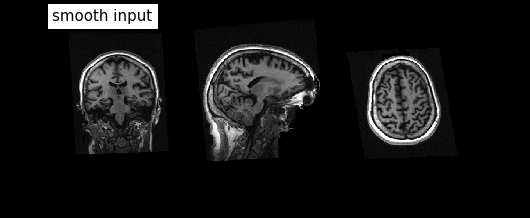

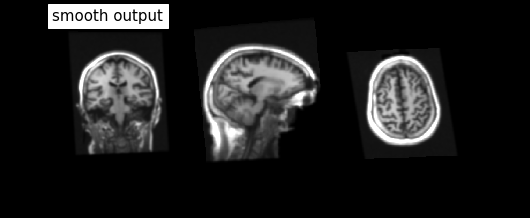

In [20]:
from nilearn.plotting import plot_anat
%pylab inline

plot_anat(smooth_node.inputs.in_file, title='smooth input', cut_coords=(10,10,10),
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);
plot_anat(smooth_res.outputs.out_file, title='smooth output', cut_coords=(10,10,10),
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);